#### Applied Predictive Modeling of Automotive Sales: A Comparative Study of Machine Learning and Time Series Algorithmic Approaches with Emphasis on Model Selection and Real-World Feature Engineering

In [14]:
# Data Handling
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
from numpy.random import normal, seed

# Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import pylab
import hvplot as hv

# Warnings
import warnings

# Statistical Analysis
import scipy.stats
from scipy.stats import (
    boxcox, chi2_contingency, norm, shapiro, kstest, normaltest
)

# Feature Engineering & Modeling
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape

# Time Series Analysis
import pmdarima as pm
import yfinance as yf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import aic, bic, rmspe, rmse
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import kstest_normal, acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# Miscellaneous
import math

In [12]:
import warnings; warnings.filterwarnings('ignore')

In [16]:
file_path = Path('data/car_sales.csv')

In [34]:
df = pd.read_csv(file_path, sep=',')

In [36]:
df.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
0,Honda,Civic,2023,25627.20,58513,Green,Certified Pre-Owned,Emily,Harris,456 Oak Ave,Brazil
1,Mazda,Mazda3,2000,12027.14,60990,Brown,Certified Pre-Owned,John,Harris,101 Maple Dr,Italy
2,Mazda,CX-5,2014,49194.93,1703,Green,Certified Pre-Owned,Karen,Wilson,202 Birch Blvd,UK
3,Hyundai,Tucson,2003,11955.94,25353,Silver,Used,Susan,Martinez,123 Main St,Mexico
4,Land Rover,Range Rover,2012,10910.01,76854,Orange,Used,Charles,Miller,456 Oak Ave,USA


In [42]:
import dataframe_image as dfi
dfi.export(df.head(), 'dataframe_image.png', table_conversion='matplotlib')

In [44]:
df.tail()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
999995,Honda,Pilot,2013,15546.60,107099,Green,New,Laura,Taylor,456 Oak Ave,UK
999996,Hyundai,Sonata,2024,52595.03,159945,Blue,Certified Pre-Owned,Emily,Moore,303 Cedar Ln,USA
999997,Nissan,Murano,2014,48278.62,43711,Gray,Used,Robert,Brown,789 Pine Rd,Italy
999998,Nissan,Sentra,2002,53124.63,101405,Yellow,Certified Pre-Owned,Angela,Martinez,404 Spruce Ct,France
999999,Hyundai,Santa Fe,2024,24576.49,115595,Black,Used,Jane,Taylor,789 Pine Rd,Italy


In [46]:
dfi.export(df.tail(), 'df_tail_initial.png', table_conversion='matplotlib')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Brand       1000000 non-null  object 
 1   Model       1000000 non-null  object 
 2   Year        1000000 non-null  int64  
 3   Price       1000000 non-null  float64
 4   Mileage     1000000 non-null  int64  
 5   Color       1000000 non-null  object 
 6   Condition   1000000 non-null  object 
 7   First Name  1000000 non-null  object 
 8   Last Name   1000000 non-null  object 
 9   Address     1000000 non-null  object 
 10  Country     1000000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 83.9+ MB


In [52]:
import io
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
plt.figure(figsize=(8, 6))
plt.text(0, 1, info_str, fontsize=10, family='monospace')
plt.axis('off')
plt.savefig("df_info.png", bbox_inches='tight')
plt.close()

In [68]:
df.columns.to_list()

['Brand',
 'Model',
 'Year',
 'Price',
 'Mileage',
 'Color',
 'Condition',
 'First Name',
 'Last Name',
 'Address',
 'Country']

In [70]:
df.dtypes

Brand          object
Model          object
Year            int64
Price         float64
Mileage         int64
Color          object
Condition      object
First Name     object
Last Name      object
Address        object
Country        object
dtype: object

## Data Handling

In [55]:
df.isna()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df.isna().sum()

Brand         0
Model         0
Year          0
Price         0
Mileage       0
Color         0
Condition     0
First Name    0
Last Name     0
Address       0
Country       0
dtype: int64

In [59]:
df.isna().sum().sum()

0

In [72]:
columns_with_missings = df.columns[df.isnull().any()]

In [86]:
if columns_with_missings > 1:
    print(columns_with_missings)
else:
    print('No Missing Values Found!')

No Missing Values Found!


In [88]:
df[columns_with_missings].isnull().sum()

Series([], dtype: float64)

In [90]:
print('Frequency counts for Brand: \n')
print(df.Brand.value_counts(dropna=False))

Frequency counts for Brand: 

Brand
Hyundai          55915
Subaru           55813
Dodge            55801
Mercedes-Benz    55799
Volkswagen       55790
Chevrolet        55731
Toyota           55672
Kia              55668
Jeep             55668
Ford             55598
Land Rover       55461
Lexus            55429
Honda            55397
Mazda            55395
Chrysler         55366
Audi             55302
BMW              55241
Nissan           54954
Name: count, dtype: int64


In [92]:
print('Frequency counts for Model: \n')
print(df.Model.value_counts(dropna=False))

Frequency counts for Model: 

Model
Voyager      18572
300          18497
Pacifica     18297
Silverado    11391
E-Class      11301
             ...  
Q5           10967
GLE          10960
CX-30        10954
X3           10952
Altima       10915
Name: count, Length: 88, dtype: int64


In [94]:
print('Frequency counts for Color: \n')
print(df.Color.value_counts(dropna=False))

Frequency counts for Color: 

Color
Gray      100417
Blue      100280
Brown     100277
Black     100178
Green     100099
White     100069
Silver     99871
Orange     99838
Red        99536
Yellow     99435
Name: count, dtype: int64


In [96]:
print('Frequency counts for Condition: \n')
print(df.Condition.value_counts(dropna=False))

Frequency counts for Condition: 

Condition
New                    333537
Certified Pre-Owned    333390
Used                   333073
Name: count, dtype: int64


In [98]:
print('Frequency counts for Country: \n')
print(df.Country.value_counts(dropna=False))

Frequency counts for Country: 

Country
USA          100496
Japan        100182
Italy        100098
Brazil       100060
Australia    100053
Mexico        99989
UK            99897
Canada        99840
France        99770
Germany       99615
Name: count, dtype: int64


According to dataset and analysis, there are no missing values, we are good to go!

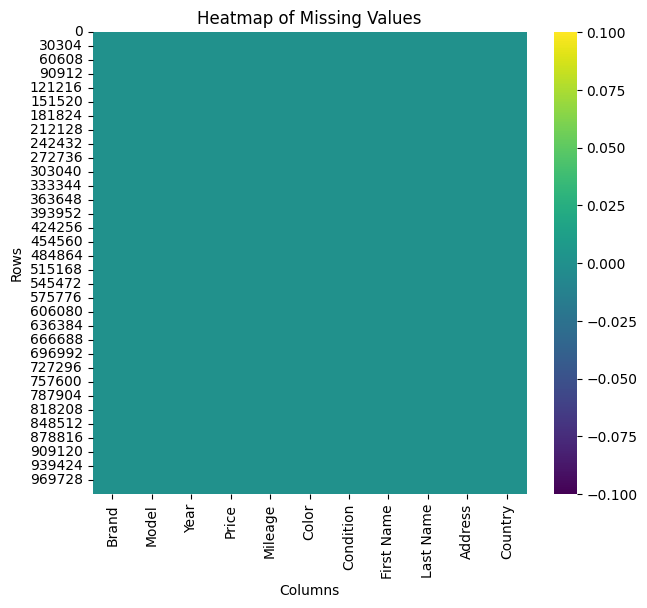

In [105]:
missing_values = df.isna()
missing_values_numeric = missing_values.astype(int)
plt.figure(figsize=(7, 6))
sns.heatmap(missing_values_numeric, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Brand       1000000 non-null  object 
 1   Model       1000000 non-null  object 
 2   Year        1000000 non-null  int64  
 3   Price       1000000 non-null  float64
 4   Mileage     1000000 non-null  int64  
 5   Color       1000000 non-null  object 
 6   Condition   1000000 non-null  object 
 7   First Name  1000000 non-null  object 
 8   Last Name   1000000 non-null  object 
 9   Address     1000000 non-null  object 
 10  Country     1000000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 83.9+ MB


## Distribution of Nominal Variables

In [108]:
nominal_variables = ['Brand', 'Model', 'Color', 'Condition', 'Country']

In [110]:
for var in nominal_variables:
    value_counts = df[var].value_counts()
    print('\n')
    print(df[var].value_counts(dropna=False))



Brand
Hyundai          55915
Subaru           55813
Dodge            55801
Mercedes-Benz    55799
Volkswagen       55790
Chevrolet        55731
Toyota           55672
Kia              55668
Jeep             55668
Ford             55598
Land Rover       55461
Lexus            55429
Honda            55397
Mazda            55395
Chrysler         55366
Audi             55302
BMW              55241
Nissan           54954
Name: count, dtype: int64


Model
Voyager      18572
300          18497
Pacifica     18297
Silverado    11391
E-Class      11301
             ...  
Q5           10967
GLE          10960
CX-30        10954
X3           10952
Altima       10915
Name: count, Length: 88, dtype: int64


Color
Gray      100417
Blue      100280
Brown     100277
Black     100178
Green     100099
White     100069
Silver     99871
Orange     99838
Red        99536
Yellow     99435
Name: count, dtype: int64


Condition
New                    333537
Certified Pre-Owned    333390
Used                 

As you can see all levels of each variable has observations > 100 which is good, if we had less than that most probably we could remove those levels.

In [116]:
for var in nominal_variables:
    value_counts = df[var].value_counts()
    levels_to_replace = value_counts[value_counts <= 50].index
    df[var] = df[var].replace(levels_to_replace, 'Other')

In [118]:
for var in nominal_variables:
    value_counts = df[var].value_counts()
    print('\n')
    print(df[var].value_counts(dropna=False))



Brand
Hyundai          55915
Subaru           55813
Dodge            55801
Mercedes-Benz    55799
Volkswagen       55790
Chevrolet        55731
Toyota           55672
Kia              55668
Jeep             55668
Ford             55598
Land Rover       55461
Lexus            55429
Honda            55397
Mazda            55395
Chrysler         55366
Audi             55302
BMW              55241
Nissan           54954
Name: count, dtype: int64


Model
Voyager      18572
300          18497
Pacifica     18297
Silverado    11391
E-Class      11301
             ...  
Q5           10967
GLE          10960
CX-30        10954
X3           10952
Altima       10915
Name: count, Length: 88, dtype: int64


Color
Gray      100417
Blue      100280
Brown     100277
Black     100178
Green     100099
White     100069
Silver     99871
Orange     99838
Red        99536
Yellow     99435
Name: count, dtype: int64


Condition
New                    333537
Certified Pre-Owned    333390
Used                 

In [ ]:
df_train, df_test = train_test_split(
    df,
    test_size = 0.3,
    stratify = df['column'],
    random_state = False # 123456 - keep constant for reproductibility
)

## Near-zero variance

What can be still problematic however is the strong concentration of variable values in one level (issue called as near-zero variance) - such variables have little predictive power and can be omitted.

To identify variables that have a small variance, use a measure based on the ratio of the most frequent and second most frequent values (frequency ratio)
For well diversified variables it will take a value close to 1, and a very high value for unbalanced data.
Another useful measure is the percent of unique values: 100 * (number of unique values) / (number of observations)

It is close to zero for data that is not very diversified.
If the frequency ratio is greater than some threshold, and the "percent of unique values" is less than a certain limit value, we can assume that the variable has a variance close to 0 and can be potentially omitted.

=> define a function which will check it with the threshold 95/5 for the frequency ratio and 10 for the percent of unique values.

In [126]:
def near_zero_variance(df, freq_cut = 95/5, unique_cut = 10):
    results = []
    for col in df.columns:
        counts = df[col].value_counts()
        if len(counts) > 1:
            freq_ratio = counts.iloc[0] / counts.iloc[1]
        else:
            freq_ratio = float('inf') # only one unique value

        # calculate unique_ratio
        unique_ratio = len(counts) / len(df)
        # determine binary indicators
        high_freq_ratio = int(freq_ratio > freq_cut)
        low_unique_ratio = int(unique_ratio < unique_cut)
        # append results
        results.append({
            'variable': col,
            'freq_ratio': freq_ratio,
            'unique_ratio': unique_ratio,
            'high_freq_ratio': high_freq_ratio,
            'low_unique_ratio': low_unique_ratio
        })
        # convert results to a DataFrame
        results_df = pd.DataFrame(results)
        # sort by 'high_freq_ratio' (descending) and 'low_unique_ratio' (ascending)
        results_df = results_df.sort_values(by=['freq_ratio', 'unique_ratio'], 
                                    ascending=[False, True])
        return results_df

In [128]:
df_nzv = near_zero_variance(df, freq_cut = 97/3, unique_cut = 10)

In [138]:
try:
    print(df_nzv[(df_nzv['low_unique_ratio'==1]) & (df_nzv['high_freq_ratio']==1)])
except:
    print('Error occured')

Error occured


In [142]:
df[:900000].tail()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
899995,Land Rover,Defender,2015,63994.42,59907,Red,Certified Pre-Owned,Daniel,Miller,505 Elm St,France
899996,Mercedes-Benz,GLE,2012,32537.65,104150,Black,Used,Angela,Smith,606 Cherry Rd,USA
899997,Kia,Seltos,2016,39006.77,62487,Orange,Certified Pre-Owned,Karen,Thompson,202 Birch Blvd,France
899998,Lexus,GX,2020,54536.56,79456,Brown,New,Joseph,Moore,505 Elm St,Italy
899999,BMW,5 Series,2020,5254.98,67115,Yellow,New,Joseph,Garcia,202 Birch Blvd,UK


In [144]:
df[900000:].head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
900000,Land Rover,Velar,2006,34905.91,83387,Brown,Used,Angela,Wilson,303 Cedar Ln,Italy
900001,Mercedes-Benz,GLE,2012,78142.32,8186,Green,New,Daniel,Brown,707 Willow St,Mexico
900002,Nissan,Titan,2011,41708.84,73803,Orange,Certified Pre-Owned,Robert,Hernandez,606 Cherry Rd,Brazil
900003,Subaru,Forester,2001,67885.10,183049,Red,Certified Pre-Owned,Sarah,Thomas,456 Oak Ave,USA
900004,Chrysler,300,2021,29298.84,8317,Silver,New,Daniel,Miller,123 Main St,Mexico


In [146]:
df.Year.value_counts()

Year
2015    40354
2011    40343
2002    40278
2003    40263
2024    40153
2020    40139
2001    40132
2016    40079
2022    40041
2007    40034
2023    40022
2004    40011
2005    39990
2000    39988
2012    39947
2014    39925
2021    39876
2019    39871
2013    39866
2010    39865
2018    39813
2009    39765
2017    39762
2006    39742
2008    39741
Name: count, dtype: int64

In [148]:
df_copy1 = df.copy()

## Train / Test Split

### Data Splitting Strategy

To prepare the dataset for modeling, I considered the following data splitting options:

1. **Index-Based Split (80/20)**  
   - Split the dataset by row index.
   - Simple but assumes data is randomly ordered, which may not hold true.

2. **Random Split (80/20 using `train_test_split`)**  
   - Randomly selects 80% of data for training and 20% for testing.
   - Effective for models where data is i.i.d. (independent and identically distributed).
   - Risk of data leakage in time-sensitive features.

3. **Year-Based Split** ✅  
   - Train on data from earlier years (e.g., before 2020), test on newer years (2020 and beyond).
   - Mimics real-world scenarios where past data is used to predict future outcomes.
   - Avoids temporal data leakage and maintains chronological integrity.

#### Chosen Approach: Year-Based Split
For this study, I chose the **year-based split** to simulate realistic forecasting conditions in car price prediction. This ensures that the model is trained on historical data and tested on unseen future-like data, which is essential for evaluating how the model generalizes over time.

#### Benefits:
- Prevents information leakage from future years.
- Enhances model relevance for time-dependent predictions.
- Reflects real deployment scenarios in pricing strategy and market forecasting.


In [152]:
df_train = df[df['Year'] < 2020]
df_test = df[df['Year'] >= 2020]

### Year-Based Train-Test Split

To preserve the temporal structure of the dataset and prevent data leakage, the dataset was split based on the `Year` column:

- **Training Set (`df_train`)**:  
  Includes all entries where `Year` is **less than 2020**.  
  - **Years covered**: 2000 to 2019  
  - **Used for model training**

- **Testing Set (`df_test`)**:  
  Includes all entries where `Year` is **2020 or later**.  
  - **Years covered**: 2020 to 2024  
  - **Used for model evaluation**

This approach simulates a real-world forecasting scenario by ensuring the model learns only from past data when making predictions on future records.


In [155]:
df_train.tail()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
999992,Jeep,Compass,2001,44984.83,92835,Red,Certified Pre-Owned,Daniel,Harris,101 Maple Dr,Germany
999994,Honda,Pilot,2005,9795.65,6825,Silver,Used,Michael,Garcia,123 Main St,Italy
999995,Honda,Pilot,2013,15546.60,107099,Green,New,Laura,Taylor,456 Oak Ave,UK
999997,Nissan,Murano,2014,48278.62,43711,Gray,Used,Robert,Brown,789 Pine Rd,Italy
999998,Nissan,Sentra,2002,53124.63,101405,Yellow,Certified Pre-Owned,Angela,Martinez,404 Spruce Ct,France


In [157]:
df_test.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
0,Honda,Civic,2023,25627.20,58513,Green,Certified Pre-Owned,Emily,Harris,456 Oak Ave,Brazil
6,Audi,A4,2021,25023.34,179187,Blue,Certified Pre-Owned,Jessica,Harris,101 Maple Dr,UK
13,Honda,CR-V,2020,43074.72,52143,Green,Used,Jessica,Harris,606 Cherry Rd,USA
19,Kia,Sportage,2021,41406.09,141356,Green,Certified Pre-Owned,Charles,Martin,505 Elm St,Germany
31,Jeep,Wrangler,2021,66282.81,78480,Blue,New,James,Brown,456 Oak Ave,Italy


In [167]:
df_train.Year.value_counts()

Year
2015    40354
2011    40343
2002    40278
2003    40263
2001    40132
2016    40079
2007    40034
2004    40011
2005    39990
2000    39988
2012    39947
2014    39925
2019    39871
2013    39866
2010    39865
2018    39813
2009    39765
2017    39762
2006    39742
2008    39741
Name: count, dtype: int64

In [171]:
df_test.Year.value_counts()

Year
2024    40153
2020    40139
2022    40041
2023    40022
2021    39876
Name: count, dtype: int64

In [176]:
for col in nominal_variables:
    print(f"\n{col} distribution:\n")
    print(df[col].value_counts())


Brand distribution:

Brand
Hyundai          55915
Subaru           55813
Dodge            55801
Mercedes-Benz    55799
Volkswagen       55790
Chevrolet        55731
Toyota           55672
Kia              55668
Jeep             55668
Ford             55598
Land Rover       55461
Lexus            55429
Honda            55397
Mazda            55395
Chrysler         55366
Audi             55302
BMW              55241
Nissan           54954
Name: count, dtype: int64

Model distribution:

Model
Voyager      18572
300          18497
Pacifica     18297
Silverado    11391
E-Class      11301
             ...  
Q5           10967
GLE          10960
CX-30        10954
X3           10952
Altima       10915
Name: count, Length: 88, dtype: int64

Color distribution:

Color
Gray      100417
Blue      100280
Brown     100277
Black     100178
Green     100099
White     100069
Silver     99871
Orange     99838
Red        99536
Yellow     99435
Name: count, dtype: int64

Condition distribution:

Conditi

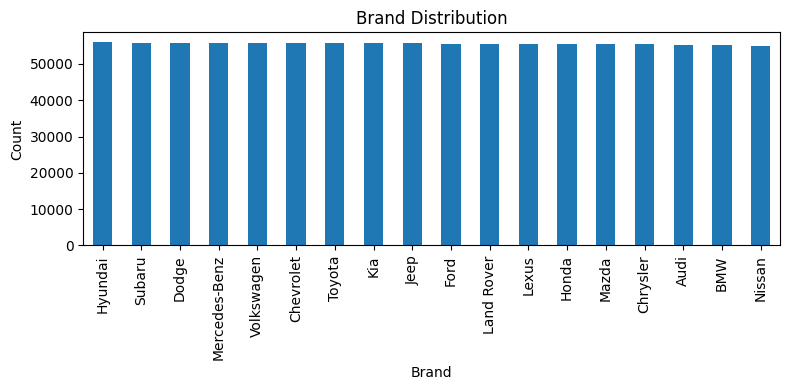

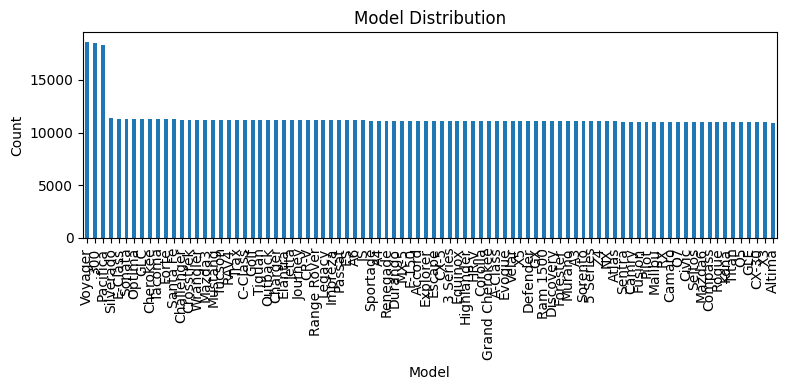

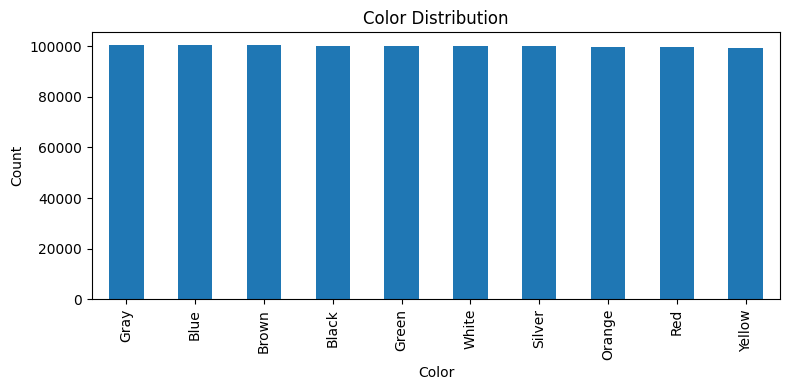

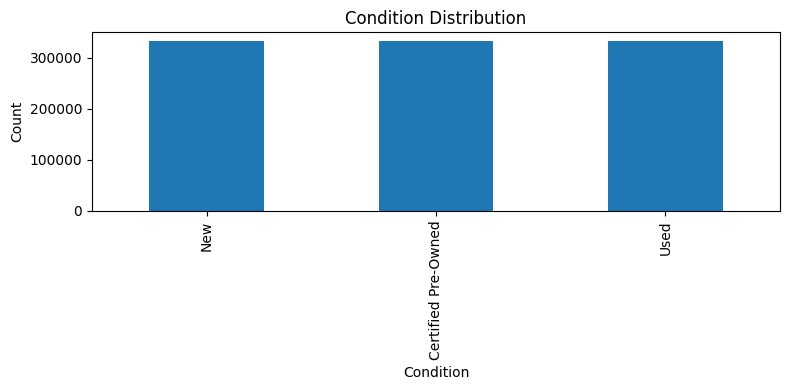

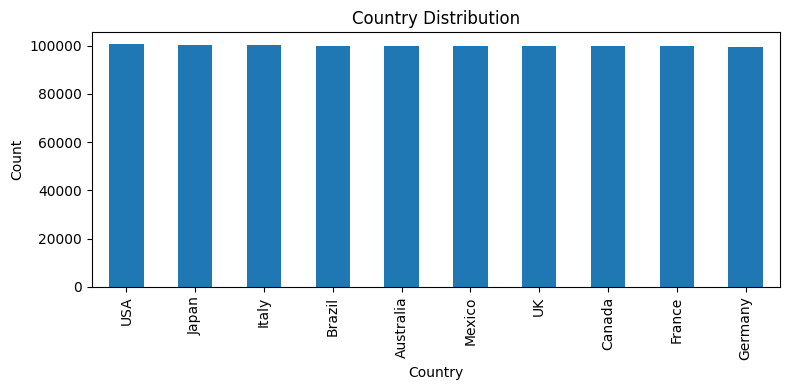

In [178]:
for col in nominal_variables:
    df[col].value_counts().plot(kind='bar', figsize=(8, 4), title=f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## Distribution of the dependent variable

### Target and Feature Variables

In this study, the goal is to **predict car prices** using available vehicle and owner-related features.

- **Dependent Variable (Target):**
  - `Price`: The numerical value representing the market price of a car.

- **Independent Variables (Predictors):**
  - All other columns excluding `Price` (e.g., `Brand`, `Model`, `Year`, `Mileage`, `Color`, `Condition`, etc.)

These independent variables will be analyzed to determine their individual and combined influence on the car's price. This involves:
- Exploring distributions and relationships
- Performing statistical tests and correlation analysis
- Building predictive models (e.g., Linear Regression, Logistic Regression)

This approach supports both **exploratory data analysis (EDA)** and **predictive modeling** to understand which features most significantly impact car pricing.


Distribution (histogram) of the dependent variable Price

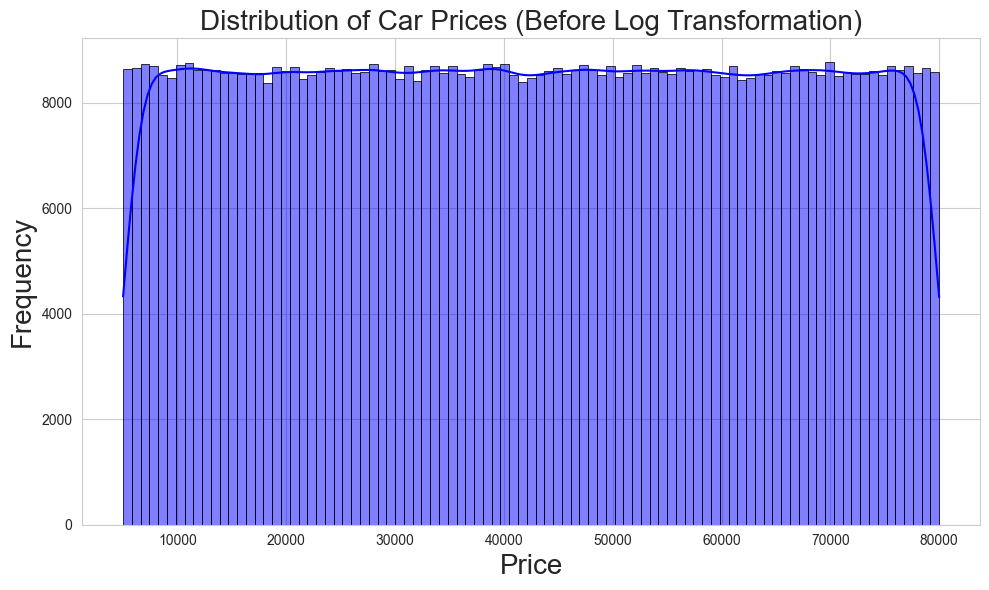

In [205]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(df_train['Price'], kde=True, color='blue', edgecolor='black')
plt.title("Distribution of Car Prices (Before Log Transformation)", fontsize=20)
plt.xlabel("Price", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

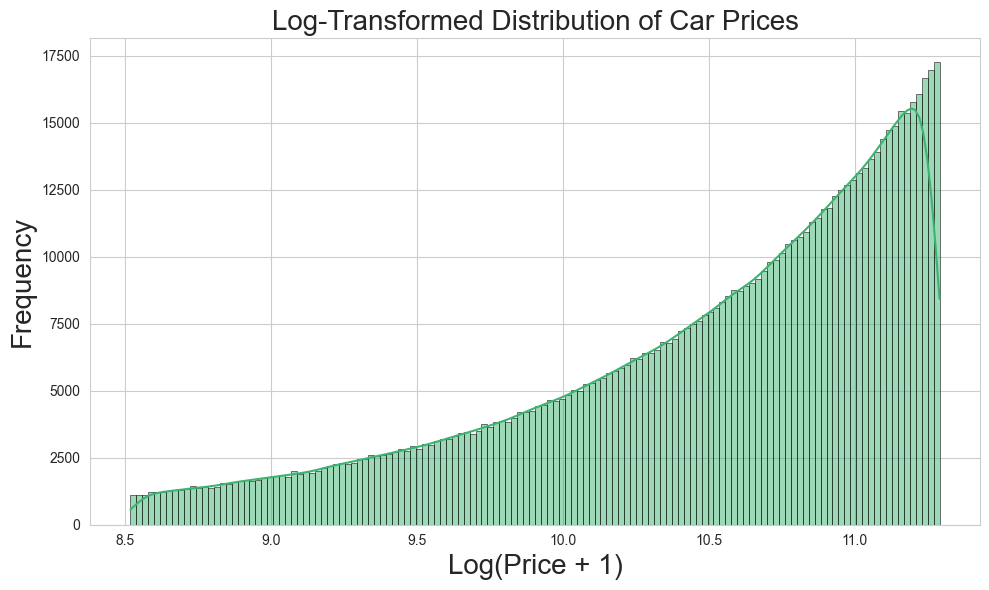

In [209]:
# Log transform
df_train['Price_Log'] = np.log(df_train['Price'] + 1)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(df_train['Price_Log'], kde=True, color='mediumseagreen', edgecolor='black')
plt.title("Log-Transformed Distribution of Car Prices", fontsize=20)
plt.xlabel("Log(Price + 1)", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

## Levels of Numerical Variables

In [212]:
numeric_variables = df_train.select_dtypes(include=[np.number]).columns

In [234]:
numeric_variables = numeric_variables.drop('Price_Log')

In [236]:
numeric_variables

Index(['Year', 'Price', 'Mileage'], dtype='object')

In [244]:
for col in numeric_variables:
    unique_vals = df_train[col].unique()
    n_unique = len(unique_vals)
    print(f'Column {col} has {n_unique} unique values.')
    # Print frequency tables for those that have only 3-5 levels
    if n_unique <= 20:
        print(f'Frequency table for {col}:')
        print(df_train[col].value_counts(dropna = False), "\n")

Column Year has 20 unique values.
Frequency table for Year:
Year
2015    40354
2011    40343
2002    40278
2003    40263
2001    40132
2016    40079
2007    40034
2004    40011
2005    39990
2000    39988
2012    39947
2014    39925
2019    39871
2013    39866
2010    39865
2018    39813
2009    39765
2017    39762
2006    39742
2008    39741
Name: count, dtype: int64 

Column Price has 758575 unique values.
Column Mileage has 196361 unique values.


### Analysis of Numerical Variables

In this analysis, the unique values and frequency distribution of numerical variables are explored to understand their structure.

1. **Year**  
   - The `Year` column contains **20 unique values**, corresponding to different car model years.  
   - The distribution shows that the number of cars for each year is fairly balanced, with the most recent years (e.g., 2015, 2011) having slightly higher counts.  
   - **Frequency distribution** of `Year`:

     ```
     2015    40354
     2011    40343
     2002    40278
     2003    40263
     2001    40132
     2016    40079
     2007    40034
     2004    40011
     2005    39990
     2000    39988
     2012    39947
     2014    39925
     2019    39871
     2013    39866
     2010    39865
     2018    39813
     2009    39765
     2017    39762
     2006    39742
     2008    39741
     ```

2. **Price**  
   - The `Price` column has **758,575 unique values**, indicating a continuous distribution of prices for cars in the dataset. This suggests that the prices are highly variable and likely influenced by several factors such as brand, model, mileage, and condition.

3. **Mileage**  
   - The `Mileage` column contains **196,361 unique values**, indicating that the mileage varies significantly across the dataset. This high variability reflects the fact that cars of different ages and conditions will have different mileage values.

This analysis helps inform future steps in preprocessing and feature engineering, such as scaling or transforming variables like `Price` and `Mileage`.


In [249]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799769 entries, 1 to 999998
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Brand       799769 non-null  object 
 1   Model       799769 non-null  object 
 2   Year        799769 non-null  int64  
 3   Price       799769 non-null  float64
 4   Mileage     799769 non-null  int64  
 5   Color       799769 non-null  object 
 6   Condition   799769 non-null  object 
 7   First Name  799769 non-null  object 
 8   Last Name   799769 non-null  object 
 9   Address     799769 non-null  object 
 10  Country     799769 non-null  object 
 11  Price_Log   799769 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 79.3+ MB


## Levels of Ordinal Variables

#### Ordinal Variables and Their Levels

In this analysis, certain categorical variables in the dataset are identified as **ordinal**, meaning they have a meaningful order or ranking. Below are the ordinal variables and their respective levels:

1. **Condition**
   - **Levels**: 
     - `New`
     - `Certified Pre-Owned`
     - `Used`
   - **Order**:  
     The `Condition` variable is ordinal because there is a clear ranking between the levels:
     - `New` > `Certified Pre-Owned` > `Used`
     - This order reflects the quality and price range of the cars.

2. **Country**
   - **Levels**: 
     - `USA`, `Japan`, `Italy`, `Brazil`, `Australia`, `Mexico`, `UK`, `Canada`, `France`, `Germany`, etc.
   - **Order**:  
     Although `Country` is technically nominal, it could be **ordered** based on car market size, production country, or geographical regions if required. However, this is not inherently an ordinal variable in this dataset.

### Other Variables (Nominal)
- **Brand**: Represents the car manufacturer (e.g., `Hyundai`, `Toyota`, `Ford`, etc.).
- **Model**: Represents the specific car model (e.g., `Voyager`, `300`, `Pacifica`).
- **Color**: Represents the color of the car (e.g., `Gray`, `Blue`, `Black`).

These variables are **nominal** since they don't have a meaningful order.


In [254]:
ordinal_variables = ['Condition']

In [256]:
for col in ordinal_variables:
    unique_vals = df_train[col].unique()
    n_unique = len(unique_vals)
    print(f"Column '{col}' has {n_unique} unique values.")
    print(f"Frequency table for '{col}':")
    print(df_train[col].value_counts(dropna = False), "\n")

Column 'Condition' has 3 unique values.
Frequency table for 'Condition':
Condition
Certified Pre-Owned    266639
New                    266638
Used                   266492
Name: count, dtype: int64 



## Encoding Categorical Variables

Most of machine learning algorithms like Linear Regression, Neural Networks, SVMs, KNN, etc are not designed to process text-based categorical data directly. So it is crucial to transform categorical data into a numerical form, a process known as data encoding.

Some tree-based ML algorithms like Decision Trees and Random Forests can handle categorical data natively, circumventing the need for encoding. However, for most other algorithms, encoding is a vital preprocessing step.



## Encoding Ordinal Variables

In [261]:
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

In [263]:
ordinal_variables_to_transform = ['Condition']

In [265]:
Condition_order = ['New', 'Certified Pre-Owned', 'Used']

Then initialize OrdinalEncoder providing a list of categories for each of the variables which will be transformed. If the argument categories= is an array, it has to be of shape (n_features, ). Put the list in the same order as in ordinal_variables_to_transform.

In [270]:
encoder_ord = OrdinalEncoder(categories = [Condition_order],
                            handle_unknown = 'use_encoded_value',
                            unknown_value = -1
                            )

fit_transform() method applied on training data and transform() method on test data
Using the transform() method we apply the same rules defined on the training data to transform the test data.

In [273]:
df_train_encoded.loc[:, ordinal_variables_to_transform] = encoder_ord.fit_transform(df_train_encoded[ordinal_variables_to_transform])

In [279]:
df_test_encoded.loc[:, ordinal_variables_to_transform] = encoder_ord.fit_transform(df_test_encoded[ordinal_variables_to_transform])

In [301]:
df_train_encoded.iloc[:,3:8].head()

,Price,Mileage,Color,Condition,First Name
1,12027.14,60990,Brown,1.0,John
2,49194.93,1703,Green,1.0,Karen
3,11955.94,25353,Silver,2.0,Susan
4,10910.01,76854,Orange,2.0,Charles
5,69148.83,26476,Gray,2.0,Joseph


In [307]:
df_train.iloc[:, 3:8].head()

,Price,Mileage,Color,Condition,First Name
1,12027.14,60990,Brown,Certified Pre-Owned,John
2,49194.93,1703,Green,Certified Pre-Owned,Karen
3,11955.94,25353,Silver,Used,Susan
4,10910.01,76854,Orange,Used,Charles
5,69148.83,26476,Gray,Used,Joseph


In [303]:
df_test_encoded.iloc[:, 3:8].head()

,Price,Mileage,Color,Condition,First Name
0,25627.20,58513,Green,1.0,Emily
6,25023.34,179187,Blue,1.0,Jessica
13,43074.72,52143,Green,2.0,Jessica
19,41406.09,141356,Green,1.0,Charles
31,66282.81,78480,Blue,0.0,James


In [309]:
df_test.iloc[:, 3:8].head()

,Price,Mileage,Color,Condition,First Name
0,25627.20,58513,Green,Certified Pre-Owned,Emily
6,25023.34,179187,Blue,Certified Pre-Owned,Jessica
13,43074.72,52143,Green,Used,Jessica
19,41406.09,141356,Green,Certified Pre-Owned,Charles
31,66282.81,78480,Blue,New,James


In [305]:
dfi.export(df_train_encoded.iloc[:,3:8].head(), 
                    'df_train_ord_encoded.png', table_conversion='matplotlib')

## Encoding Nominal Variables

One-hot encoding is appropriate when the categories do not have an intrinsic ordering or relationship with each other. This is because one-hot encoding treats each category as a separate entity with no relation to the other categories. One-hot encoding is also useful when the number of categories is relatively small, as the number of columns can become unwieldly for very large numbers of categories.

pandas.get_dummies is a straightforward to use and it automatically converts only the listed column(s), keeping all others untouched, but copying them into a resulting dataset.

Another approach is to use OneHotEncoder from the sklearn library, which is useful in Machine Learning tasks.

The difference is pandas.get_dummies cannot learn encodings - store the rules to apply it on another dataset. It can only perform one-hot-encoding on the dataset you pass as an input.

sklearn.OneHotEncoder is a class that can be saved and used to transform other incoming datasets in the future. However, it requires more data transformations if applied out of the model pipeline.

In [319]:
nominal_variables = nominal_variables.remove('Condition')

In [323]:
nominal_variables

In [325]:
nominal_variables = ['Brand', 'Model', 'Color', 'Country']

In [327]:
nominal_variables_left = nominal_variables

In [331]:
# one-hot encoding using the pandas get_dummies()

# train
df_train_encoded = pd.get_dummies(df_train_encoded,
                                  columns = nominal_variables_left,
                                  drop_first = True,
                                  dtype = int
                                 )

In [333]:
# test
df_test_encoded = pd.get_dummies(df_test_encoded,
                                 columns = nominal_variables_left,
                                 drop_first = True,
                                 dtype = int
                                )

In [335]:
df_train_encoded.head()

,Year,Price,Mileage,Condition,First Name,Last Name,Address,Price_Log,Brand_BMW,Brand_Chevrolet,...,Color_Yellow,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Mexico,Country_UK,Country_USA
1,2000,12027.14,60990,1.0,John,Harris,101 Maple Dr,9.395004,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2014,49194.93,1703,1.0,Karen,Wilson,202 Birch Blvd,10.803566,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2003,11955.94,25353,2.0,Susan,Martinez,123 Main St,9.389067,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2012,10910.01,76854,2.0,Charles,Miller,456 Oak Ave,9.297528,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2002,69148.83,26476,2.0,Joseph,Moore,789 Pine Rd,11.144031,0,0,...,0,0,0,1,0,0,0,0,0,0


In [337]:
df_test_encoded.head()

,Year,Price,Mileage,Condition,First Name,Last Name,Address,Brand_BMW,Brand_Chevrolet,Brand_Chrysler,...,Color_Yellow,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Mexico,Country_UK,Country_USA
0,2023,25627.20,58513,1.0,Emily,Harris,456 Oak Ave,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,2021,25023.34,179187,1.0,Jessica,Harris,101 Maple Dr,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13,2020,43074.72,52143,2.0,Jessica,Harris,606 Cherry Rd,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19,2021,41406.09,141356,1.0,Charles,Martin,505 Elm St,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31,2021,66282.81,78480,0.0,James,Brown,456 Oak Ave,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### above is one-hot encoded
### below is original dataset

In [340]:
df_train.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country,Price_Log
1,Mazda,Mazda3,2000,12027.14,60990,Brown,Certified Pre-Owned,John,Harris,101 Maple Dr,Italy,9.395004
2,Mazda,CX-5,2014,49194.93,1703,Green,Certified Pre-Owned,Karen,Wilson,202 Birch Blvd,UK,10.803566
3,Hyundai,Tucson,2003,11955.94,25353,Silver,Used,Susan,Martinez,123 Main St,Mexico,9.389067
4,Land Rover,Range Rover,2012,10910.01,76854,Orange,Used,Charles,Miller,456 Oak Ave,USA,9.297528
5,Kia,Sportage,2002,69148.83,26476,Gray,Used,Joseph,Moore,789 Pine Rd,France,11.144031


In [342]:
df_test.head()

,Brand,Model,Year,Price,Mileage,Color,Condition,First Name,Last Name,Address,Country
0,Honda,Civic,2023,25627.20,58513,Green,Certified Pre-Owned,Emily,Harris,456 Oak Ave,Brazil
6,Audi,A4,2021,25023.34,179187,Blue,Certified Pre-Owned,Jessica,Harris,101 Maple Dr,UK
13,Honda,CR-V,2020,43074.72,52143,Green,Used,Jessica,Harris,606 Cherry Rd,USA
19,Kia,Sportage,2021,41406.09,141356,Green,Certified Pre-Owned,Charles,Martin,505 Elm St,Germany
31,Jeep,Wrangler,2021,66282.81,78480,Blue,New,James,Brown,456 Oak Ave,Italy


### Encoded DF

In [345]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799769 entries, 1 to 999998
Columns: 130 entries, Year to Country_USA
dtypes: float64(2), int32(122), int64(2), object(4)
memory usage: 443.2+ MB


In [347]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200231 entries, 0 to 999999
Columns: 129 entries, Year to Country_USA
dtypes: float64(1), int32(122), int64(2), object(4)
memory usage: 105.4+ MB


In [349]:
df_train_encoded.describe()

,Year,Price,Mileage,Price_Log,Brand_BMW,Brand_Chevrolet,Brand_Chrysler,Brand_Dodge,Brand_Ford,Brand_Honda,...,Color_Yellow,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Mexico,Country_UK,Country_USA
count,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000,799769.00000,799769.000000,799769.00000,799769.000000,...,799769.000000,799769.000000,799769.00000,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000,799769.000000
mean,2009.492341,42488.623291,99997.351644,10.474032,0.055228,0.055612,0.05539,0.055992,0.05556,0.055497,...,0.099505,0.100106,0.09991,0.099854,0.099780,0.100238,0.100190,0.099710,0.099641,0.100484
std,5.767600,21661.707252,57730.926207,0.674026,0.228426,0.229172,0.22874,0.229907,0.22907,0.228948,...,0.299339,0.300142,0.29988,0.299805,0.299707,0.300317,0.300254,0.299613,0.299521,0.300644
min,2000.000000,5000.060000,0.000000,8.517405,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,23741.540000,50053.000000,10.075024,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,42482.600000,99969.000000,10.656873,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,61230.270000,149990.000000,11.022413,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,79999.960000,200000.000000,11.289794,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [353]:
df_train_encoded.columns.to_list()

['Year',
 'Price',
 'Mileage',
 'Condition',
 'First Name',
 'Last Name',
 'Address',
 'Price_Log',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Chrysler',
 'Brand_Dodge',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_Lexus',
 'Brand_Mazda',
 'Brand_Mercedes-Benz',
 'Brand_Nissan',
 'Brand_Subaru',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Model_300',
 'Model_5 Series',
 'Model_A-Class',
 'Model_A3',
 'Model_A4',
 'Model_A6',
 'Model_Accord',
 'Model_Altima',
 'Model_Atlas',
 'Model_C-Class',
 'Model_CR-V',
 'Model_CX-30',
 'Model_CX-5',
 'Model_Camaro',
 'Model_Camry',
 'Model_Challenger',
 'Model_Charger',
 'Model_Cherokee',
 'Model_Civic',
 'Model_Compass',
 'Model_Corolla',
 'Model_Crosstrek',
 'Model_Defender',
 'Model_Discovery',
 'Model_Durango',
 'Model_E-Class',
 'Model_ES',
 'Model_Elantra',
 'Model_Equinox',
 'Model_Escape',
 'Model_Evoque',
 'Model_Explorer',
 'Model_F-150',
 'Model_Forester',
 'Model_Forte',
 'Model_F

In [355]:
df_test_encoded.columns.to_list()

['Year',
 'Price',
 'Mileage',
 'Condition',
 'First Name',
 'Last Name',
 'Address',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Chrysler',
 'Brand_Dodge',
 'Brand_Ford',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_Lexus',
 'Brand_Mazda',
 'Brand_Mercedes-Benz',
 'Brand_Nissan',
 'Brand_Subaru',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Model_300',
 'Model_5 Series',
 'Model_A-Class',
 'Model_A3',
 'Model_A4',
 'Model_A6',
 'Model_Accord',
 'Model_Altima',
 'Model_Atlas',
 'Model_C-Class',
 'Model_CR-V',
 'Model_CX-30',
 'Model_CX-5',
 'Model_Camaro',
 'Model_Camry',
 'Model_Challenger',
 'Model_Charger',
 'Model_Cherokee',
 'Model_Civic',
 'Model_Compass',
 'Model_Corolla',
 'Model_Crosstrek',
 'Model_Defender',
 'Model_Discovery',
 'Model_Durango',
 'Model_E-Class',
 'Model_ES',
 'Model_Elantra',
 'Model_Equinox',
 'Model_Escape',
 'Model_Evoque',
 'Model_Explorer',
 'Model_F-150',
 'Model_Forester',
 'Model_Forte',
 'Model_Fusion',
 'Mode

# Feature Selection

In [366]:
''' 
df 
df_copy
df_train
df_test
df_train_copy
df_test_copy
df_train_encoded
df_test_encoded

'''

' \ndf \ndf_copy\ndf_train\ndf_test\ndf_train_copy\ndf_test_copy\ndf_train_encoded\ndf_test_encoded\n\n'

In [364]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

---
For now forget about encoding and decoding stuff, I have prepared ready encoded version of the dataset, now it is important to analyze the relationship between variables.

---